In this task, you should train a fully-connected model with pytorch to classify MNIST dataset.

# Load the dataset

Load the MNIST dataset bellow. You can use either `torchvision.datasets.MNIST` or `sklearn.datasets.fetch_openml()` or any other way to load the dataset.

In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import os
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform_compose = transforms.Compose([
    transforms.ToTensor(),
])

mnist_dataset = datasets.MNIST(root='dataset', train=True, download=True, transform=transform_compose)
train_size = int(0.9 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(mnist_dataset, (train_size, val_size))

test_dataset = datasets.MNIST(root='dataset', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



# Design your model

Write your fully-connected model below using `torch.nn` modules. Feel free to add extra cells.

In [19]:
class DigitRecognizer(nn.Module):

    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(28*28, 512)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(512, 10)

        
    def forward(self, x):
        x = self.lin1(x)    
        x = self.relu(x)
        x = self.lin2(x)    
        return x

In [20]:
model = DigitRecognizer().to(device)
model

DigitRecognizer(
  (lin1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=512, out_features=10, bias=True)
)

# Train your model

Write the training process below. Instantiate your model, Create an optimizer function such as Adam or SGD, and write your train/validation loop. Then train your model until it converges. Feel free to add extra cells.

In [21]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
num_epochs = 40

train_loss_arr, val_loss_arr = [], []
train_accuracy, val_accuracy = [], [] 
for epoch in range(num_epochs):
    train_loss, val_loss = 0, 0

    model.train()

    epoch_all_train = 0
    epoch_true_train = 0
    epoch_accuracy = 0
    epoch_all_val = 0
    epoch_true_val = 0
    n = 0 
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        x = x.reshape((-1, 784))
        optimizer.zero_grad()
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        train_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_train += len(predictions)
        epoch_true_train += int((predictions == y).sum())

        batch_loss.backward()

        optimizer.step()
    
    epoch_true_train *= 100.0 / n

  
    n = 0
    model.eval()            
    with torch.no_grad():
      for i, (x, y) in enumerate(val_loader):
        x = x.to(device)
        y = y.to(device)
        x = x.reshape((-1, 784))
        p = model(x)
        n += len(x)

        batch_loss = criterion(p, y)
        batch_size = p.shape[0]
        val_loss += float(batch_loss.item() * batch_size)

        predictions = p.argmax(-1)
        epoch_all_val += len(predictions)
        epoch_true_val += int((predictions == y).sum())

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    epoch_true_val *= 100.0 / n

    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    train_accuracy.append(epoch_true_train)
    val_accuracy.append(epoch_true_val)

    print(f"[Epoch {epoch}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t"
        f"Train Accuracy: {epoch_true_train:.2f}\t"
        f"Validation Accuracy: {epoch_true_val:.2f}")

[Epoch 0]	Train Loss: 0.5435	Validation Loss: 0.2987	Train Accuracy: 87.63	Validation Accuracy: 91.50
[Epoch 1]	Train Loss: 0.2644	Validation Loss: 0.2299	Train Accuracy: 92.68	Validation Accuracy: 93.38
[Epoch 2]	Train Loss: 0.2090	Validation Loss: 0.1875	Train Accuracy: 94.19	Validation Accuracy: 94.58
[Epoch 3]	Train Loss: 0.1715	Validation Loss: 0.1594	Train Accuracy: 95.17	Validation Accuracy: 95.37
[Epoch 4]	Train Loss: 0.1444	Validation Loss: 0.1395	Train Accuracy: 95.98	Validation Accuracy: 95.80
[Epoch 5]	Train Loss: 0.1239	Validation Loss: 0.1250	Train Accuracy: 96.54	Validation Accuracy: 96.18
[Epoch 6]	Train Loss: 0.1075	Validation Loss: 0.1122	Train Accuracy: 97.06	Validation Accuracy: 96.55
[Epoch 7]	Train Loss: 0.0946	Validation Loss: 0.1036	Train Accuracy: 97.40	Validation Accuracy: 96.82
[Epoch 8]	Train Loss: 0.0837	Validation Loss: 0.0947	Train Accuracy: 97.70	Validation Accuracy: 97.17
[Epoch 9]	Train Loss: 0.0743	Validation Loss: 0.0913	Train Accuracy: 97.96	Validat

# Draw the training curves

Draw two diagrams for train and validation, one showing loss of each epoch, and another showing accuracy of each epoch.

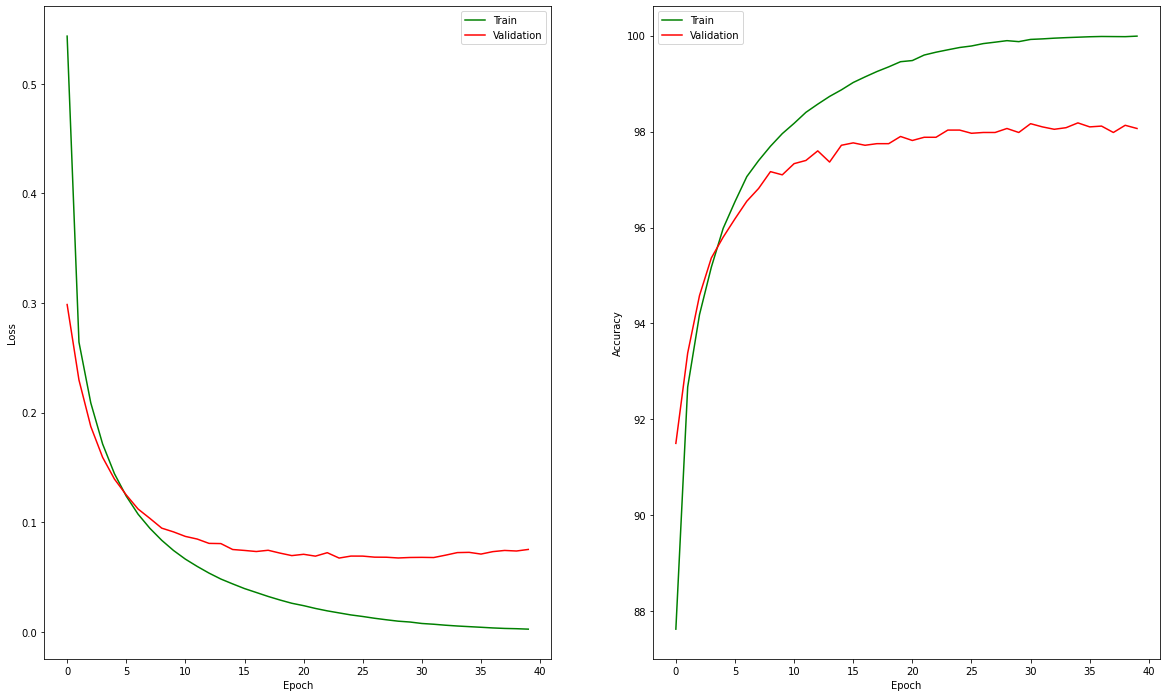

In [37]:
plt.subplot(1, 2, 1)

plt.plot(train_loss_arr,'green',label = 'Train')
plt.plot(val_loss_arr,'red',label = 'Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.rcParams["figure.figsize"] = (20,15)


plt.subplot(1, 2, 2)

plt.plot(train_accuracy,'green',label = 'Train')
plt.plot(val_accuracy,'red',label = 'Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.rcParams["figure.figsize"] = (20,15)


plt.show()

# Evaluate your model

Evaluate the best epoch's model (according to the validation accuracy) on the test set, and report the accuracy. Is your model overfitted?

In [38]:
model.eval()
accuracy = 0.0
total = 0.0
test_loss = 0
with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      images = images.reshape((-1, 784))
      outputs = model(images)
      batch_loss = criterion(p, y)
      batch_size = p.shape[0]
      test_loss += float(batch_loss.item() * batch_size)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")
accuracy = (100 * accuracy / total)
print(f"accuracy: {accuracy:.2f}")

Test Loss: 0.2234
accuracy: 98.08


Our model performs perfect because we can see that the accuracy for the test set is good enough.

# Draw misclassified images

Draw 20 misclassified images from test set with expected and predicted labels.

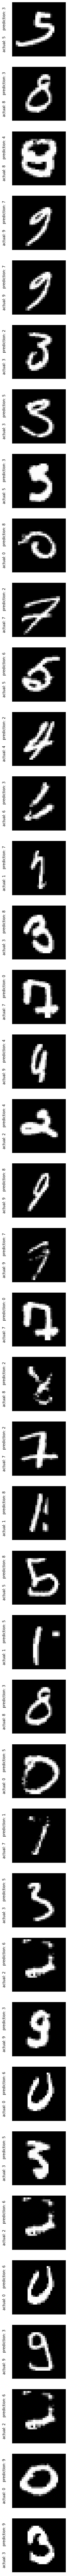

In [50]:
batch_size = 32
wrong_images = []
predicted_actual = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
      x, labels = data
      images = x.to(device)
      labels = labels.to(device)
      images = images.reshape((-1, 784))
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      for i in range(len(predicted)):
        p = predicted[i].item()
        l = labels[i].item()
        predicted_labels.append(p)
        if p != l:
          wrong_images.append(x[i])
          predicted_actual.append("actual: " + str(l) + "     prediction: "+ str(p))

num_imgs = 40
fig, axs = plt.subplots(num_imgs, 1, figsize=(7, 128))
for i, idx in enumerate(torch.randint(0, len(wrong_images), [num_imgs])):
    x = wrong_images[idx]
    axs[i].imshow(x[0], cmap='gray')
    axs[i].set_ylabel(predicted_actual[idx] + "\n")
    for k in range(1):
        axs[i].set_yticks([])
        axs[i].set_xticks([])

# Plot the confusion matrix

Plot the confusion matrix for the test set.

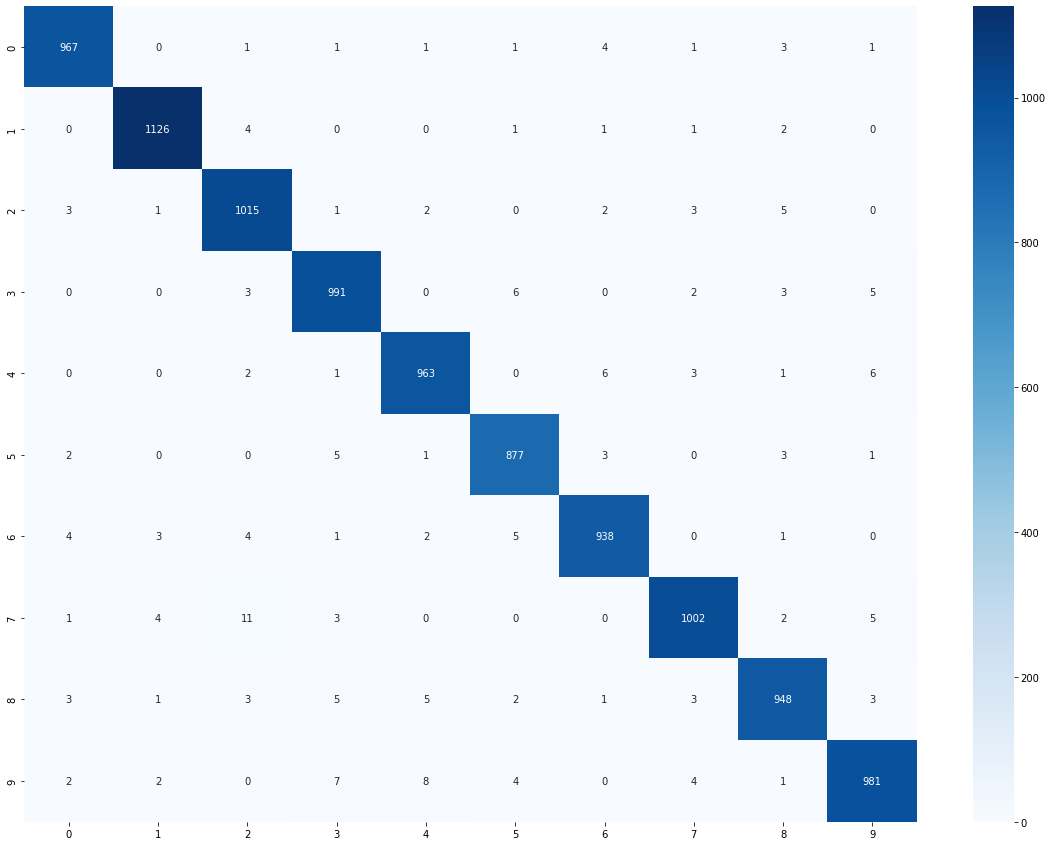

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = [x for _, x in test_loader.dataset]
predicted = [int(x) for x in predicted_labels]
sns.heatmap(confusion_matrix(true_labels, predicted), cmap="Blues", annot=True, fmt='d')